In [2]:
# Importing Libraries
import numpy as np
import pandas as pd
from matplotlib import  pyplot as plt
import seaborn as sns
import sklearn

In [19]:
# Importing the data
url_train="https://www.ee.iitb.ac.in/~asethi/Dump/MouseTrain.csv" #referencing url of data
df_train = pd.read_csv(url_train) #importing train data
# display(df_train.head()) # display train data

url_test = "https://www.ee.iitb.ac.in/~asethi/Dump/MouseTest.csv" #referencing url of test data
df_test = pd.read_csv(url_test) #importing test data
# display(df_test) # display test data
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 762 entries, 0 to 761
Data columns (total 79 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   DYRK1A_N            762 non-null    float64
 1   ITSN1_N             762 non-null    float64
 2   BDNF_N              762 non-null    float64
 3   NR1_N               762 non-null    float64
 4   NR2A_N              762 non-null    float64
 5   pAKT_N              762 non-null    float64
 6   pBRAF_N             762 non-null    float64
 7   pCAMKII_N           762 non-null    float64
 8   pCREB_N             762 non-null    float64
 9   pELK_N              762 non-null    float64
 10  pERK_N              762 non-null    float64
 11  pJNK_N              762 non-null    float64
 12  PKCA_N              762 non-null    float64
 13  pMEK_N              762 non-null    float64
 14  pNR1_N              762 non-null    float64
 15  pNR2A_N             762 non-null    float64
 16  pNR2B_N 

In [21]:
# printing column names
df_train.columns
# df_train.describe()
df_train.nunique()
df_train['Treatment_Behavior'].unique()
k=
pd.DataFrame(df_train.isnull().sum())

In [4]:
def drop_col (df_train,df_test,threshold=0.5):  
    '''
    Drops column which have nan values above a certain threshold
    '''
    number_na = [df_train[x].isna().sum() for x in df_train.columns] # finding the number of nan per column 
    number_na = np.array(number_na) # Converting list to np array
    index_dropped = np.where(number_na > threshold*np.shape(df_train)[0])[0] #finding index of columns to be dropped
    df_train.drop(df_train.columns[index_dropped], axis = 1, inplace = True) #dropping columns in train
    df_test.drop(df_test.columns[index_dropped], axis = 1, inplace = True) #dropping columns in test

In [5]:
drop_col(df_train,df_test)

In [6]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import RobustScaler

In [7]:
def imputation(df,strat='mean'): #imputation using given strategy, default mean
    number_na = [df_train[x].isna().sum() for x in df_train.columns] #finding number of nan per column
    number_na = np.array(number_na) #converting list to array
    index_dropped = np.where(number_na > 0)[0] #finding index of columns to be imputed
    imputer = SimpleImputer(strategy=strat, missing_values=np.nan) #imputation of strategy in nan
    imputer = imputer.fit(df.iloc[:,index_dropped]) #fit
    df.iloc[:,index_dropped] = imputer.transform(df.iloc[:,index_dropped]) #transform

In [8]:
imputation(df_train)

In [9]:
def scale(df):
    scaler = RobustScaler()
    df.iloc[:,1:-3] = scaler.fit_transform(df.iloc[:,1:-3])

In [27]:
scale(df_train)
scale(df_test)


In [33]:
df_train.describe()

,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,...,SHH_N,BAD_N,BCL2_N,pS6_N,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N
count,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,...,225.000000,2.250000e+02,2.250000e+02,225.000000,225.000000,225.000000,2.250000e+02,225.000000,225.000000,225.000000
mean,0.418431,0.123944,0.036165,-0.013673,0.052372,-0.015690,-0.094838,0.121460,-0.020880,0.011581,...,0.173826,1.894781e-16,7.460699e-16,-0.057410,0.246623,-0.026510,-2.486900e-16,0.156764,0.000000,1.322796
std,0.190422,0.683239,0.811568,0.719247,0.739222,0.712624,0.647703,0.645141,0.768349,0.835979,...,0.876656,7.596893e-01,9.301176e-01,0.686025,0.961113,0.603117,7.952563e-01,0.801864,1.645994,0.271271
min,0.145327,-1.094330,-2.831298,-1.743990,-1.521856,-1.711848,-1.560178,-1.039392,-1.731330,-1.579302,...,-1.962930,-1.239065e+00,-1.897334e+00,-2.042439,-1.096405,-1.274341,-1.173367e+00,-0.940188,-3.578641,0.848214
25%,0.263753,-0.428346,-0.512541,-0.492828,-0.475145,-0.546969,-0.678986,-0.366122,-0.540622,-0.481496,...,-0.417891,-5.885634e-01,-6.327909e-01,-0.588120,-0.377972,-0.516830,-6.011506e-01,-0.445377,-0.816252,1.092526
50%,0.332816,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,1.305780
75%,0.567562,0.571654,0.487459,0.507172,0.524855,0.453031,0.321014,0.633878,0.459378,0.518504,...,0.582109,4.114366e-01,3.672091e-01,0.411880,0.622028,0.483170,3.988494e-01,0.554623,0.183748,1.564925
max,0.992220,1.980192,2.473243,1.685045,2.180669,1.738132,2.074819,1.672079,2.238434,3.693331,...,3.208764,2.572704e+00,2.928786e+00,1.717443,4.638500,1.310863,3.446164e+00,3.350491,7.424105,1.842435


<AxesSubplot:>

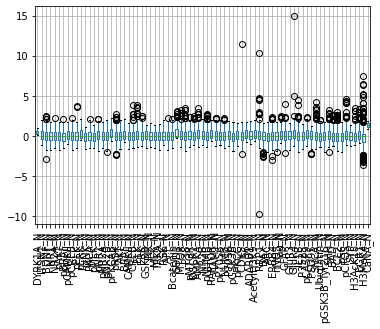

In [34]:
df_train.boxplot(rot=90,fontsize=10)